In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '15'

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
from functools import partial

import models
from utility import lr_schlr
from canary_attack import load_dataset, setup_model, evaluate_canary_attack, inject_canary
from canary_utility import local_training
from canary_attack import inject_canary

In [16]:
rng_seed = None
dataset_key = "cifar100"
dataset_key_shadow = "cifar10"
batch_size_train = 256
batch_size_test = 64
# if pretrain model before canary injection (simulating FL)
pre_train = False

# attack
max_number_of_iters = 10000
#init_lr = .01
#setps_lrs = [1000, 2000]
#opt = tf.keras.optimizers.Adam(lr_schlr(init_lr, setps_lrs))
opt = tf.keras.optimizers.Adam()

model_id = 'resnet20'
canary_id = 'last_layer'
loss_function = models.sparse_classification_loss
max_number_of_iters = 2000
loss_threshold = 0.0005

# FedAVG
num_iter_fedAVG = 15
learning_rate_fedAVG = 0.001

name = '_'.join(map(str,[dataset_key, dataset_key_shadow, batch_size_train, loss_threshold, model_id, canary_id, loss_threshold, learning_rate_fedAVG]))
print(name)

0_cifar100_cifar10_256_0.0005_resnet20_last_layer_0.0005_0.001


# Load datasets

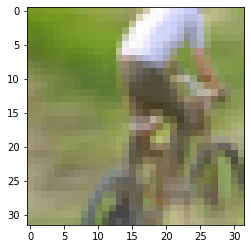

In [3]:
tf.random.set_seed(rng_seed)

validation, shadow, x_shape, class_num, (x_target, y_target) = load_dataset(
    dataset_key,
    dataset_key_shadow,
    batch_size_test,
    batch_size_train,
    data_aug_shadow=False
)
    
plt.imshow((x_target[0]+1)/2);

# Chosing canary location (i.e., $\xi$)

In [4]:
model, layer_idx, g_canary_shift, kernel_idx, pre_canary_layer_trainable_variables = setup_model(model_id, canary_id, x_shape, class_num)

----> layer_normalization_20 (None, 8, 8, 64)
--------> (None, 8, 8)
input_1

conv2d
	 conv2d/kernel:0

layer_normalization
	 layer_normalization/gamma:0
	 layer_normalization/beta:0

activation

conv2d_1
	 conv2d_1/kernel:0

layer_normalization_1
	 layer_normalization_1/gamma:0
	 layer_normalization_1/beta:0

activation_1

conv2d_2
	 conv2d_2/kernel:0

layer_normalization_2
	 layer_normalization_2/gamma:0
	 layer_normalization_2/beta:0

activation_2

tf.__operators__.add

conv2d_3
	 conv2d_3/kernel:0

layer_normalization_3
	 layer_normalization_3/gamma:0
	 layer_normalization_3/beta:0

activation_3

conv2d_4
	 conv2d_4/kernel:0

layer_normalization_4
	 layer_normalization_4/gamma:0
	 layer_normalization_4/beta:0

activation_4

tf.__operators__.add_1

conv2d_5
	 conv2d_5/kernel:0

layer_normalization_5
	 layer_normalization_5/gamma:0
	 layer_normalization_5/beta:0

activation_5

conv2d_6
	 conv2d_6/kernel:0

layer_normalization_6
	 layer_normalization_6/gamma:0
	 layer_normalization_6/

Loss Threshold reached!


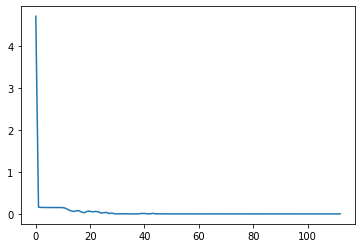

In [5]:
logs = inject_canary(
    max_number_of_iters,
    batch_size_train,
    model,
    x_target,
    shadow,
    pre_canary_layer_trainable_variables,
    opt,
    loss_threshold=loss_threshold
)

plt.plot(logs[0]);

In [6]:
test_canary_fn = partial(
    evaluate_canary_attack,
    target=x_target,
    dataset_validation=validation,
    variables=pre_canary_layer_trainable_variables,
    loss_function=loss_function,
    g_canary_shift=g_canary_shift,
    kernel_idx=kernel_idx
)

out, failed = test_canary_fn(model)
out

Max number of iterations evaluation reached!


{'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0}

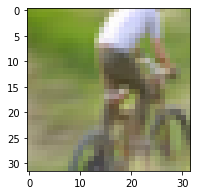

In [7]:
fig, ax = plt.subplots(1,1,figsize=(3,3))
ax.imshow((x_target[0]+1)/2);

for x in failed[:5]:
    fig, ax = plt.subplots(1,1,figsize=(3,3))
    ax.imshow((x[0]+1)/2)

In [8]:
canary_scores_FedAVG = local_training(
    model,
    validation,
    num_iter_fedAVG,
    learning_rate_fedAVG,
    loss_function,
    test_canary_fn
)

Max number of iterations evaluation reached!
 FedAVG round: 1
	{'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0}
Max number of iterations evaluation reached!
 FedAVG round: 2
	{'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0}
Max number of iterations evaluation reached!
 FedAVG round: 3
	{'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0}
Max number of iterations evaluation reached!
 FedAVG round: 4
	{'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0}
Max number of iterations evaluation reached!
 FedAVG round: 5
	{'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0}
Max number of iterations evaluation reached!
 FedAVG round: 6
	{'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0}
Max number of iterations evaluation reached!
 FedAVG round: 7
	{'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0}
Max number of iterations evaluation reached!
 FedAVG round: 8
	{'accuracy': 1.0, 'recall': 1.0, 'precision': 1.0}
Max number of iterations evaluation reached!
 FedAVG round: 9
	{'accuracy': 1.0, 'recall

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
ax.plot([x['accuracy'] for x in canary_scores_FedAVG])
ax.set(ylim=(.5,1))
ax.grid();

In [18]:
import myPickle
myPickle.dump?

Signature: myPickle.dump(filename, data, **kargs)
Docstring: <no docstring>
File:      ~/LIBS/myPickle.py
Type:      function
